# Sentiment Analysis - CP322
## Riley Huston (190954880) | Samson Goodenough (190723380) | Shailendra Singh ()

In [125]:
# import libraries
import nltk
import pandas as pd
import sklearn
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

# visualization
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# download dependenciesquirements
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('treebank')
nltk.download('tagsets')

print('Finished downloading')

Finished downloading


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mrrjh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mrrjh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrrjh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mrrjh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mrrjh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mrrjh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_d

In [86]:
# import data
df = pd.read_csv('reviews.csv')

# remove all reviews not voted as helpful
df = df[df['Positive Feedback Count'] > 0]

# remove all null and unnecessary features
reviews = df.drop(labels=['Clothing ID', 'Title'], axis=1)
reviews.dropna(inplace=True)

reviews.head()

,id,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,49,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,39,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,39,"I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits


In [89]:
titles = df.drop(labels=['Clothing ID', 'Review Text'], axis=1)
titles.dropna(inplace=True)
titles.head()

,id,Age,Title,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
4,4,47,Flattering shirt,5,1,6,General,Tops,Blouses
5,5,49,Not for the very petite,2,0,4,General,Dresses,Dresses
6,6,39,Cagrcoal shimmer fun,5,1,1,General Petite,Tops,Knits
7,7,39,"Shimmer, surprisingly goes with lots",4,1,4,General Petite,Tops,Knits
10,10,53,Dress looks like it's made of cheap material,3,0,14,General,Dresses,Dresses


In [146]:


corpusReview = []
for review in reviews['Review Text']:
    corpusReview.append(word_tokenize(review))
stop_words=set(stopwords.words("english"))

stop_words=set(stopwords.words("english"))
stem = PorterStemmer()

filteredCorpusReview = []
for tokens in corpusReview:
    for word in tokens:
        if word not in stop_words and not re.match(r'^[_\W0-9]+$', word): # remove stop words and single special character words
            filteredCorpusReview.append(stem.stem(word))



In [147]:
corpusTitle = []
for title in titles['Title']:
    corpusTitle.append(word_tokenize(title))

filteredCorpusTitle = []
for tokens in corpusTitle:
    for word in tokens:
        if word not in stop_words and not re.match(r'^[_\W0-9]+$', word): # remove stop words and single special character words
            filteredCorpusTitle.append(stem.stem(word))

### Visualization

<FreqDist with 10613 samples and 400717 outcomes>


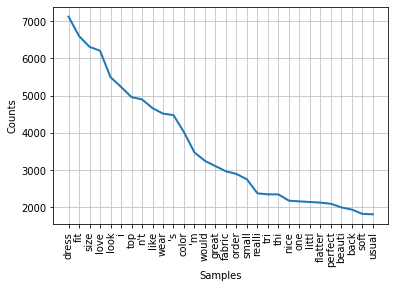

In [148]:
fdistReview = FreqDist(filteredCorpusReview)
print(fdistReview)

fdistReview.plot(30,cumulative=False)
plt.show()

<FreqDist with 2511 samples and 28314 outcomes>


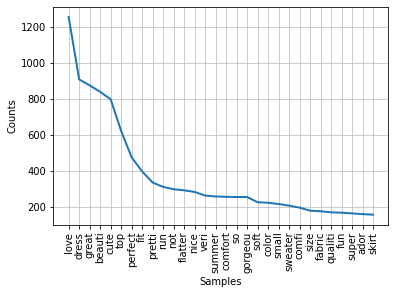

In [149]:
fdistTitle = FreqDist(filteredCorpusTitle)
print(fdistTitle)

fdistTitle.plot(30,cumulative=False)
plt.show()

In [150]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
#tokenizer to remove unwanted elements from out data like symbols and numbers
cv = CountVectorizer(lowercase=True,ngram_range = (1,1))
training = cv.fit_transform(filteredCorpusReview).toarray()
training

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
rpusus